In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("energydata_complete.csv")
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [3]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [4]:
inputs = df.drop(["Appliances", "lights", "date", "rv1", "rv2"], axis=1)
target = df["Appliances"] + df["lights"]
target.name = "total_energy"

In [5]:
target

0         90
1         90
2         80
3         90
4        100
        ... 
19730    100
19731     90
19732    280
19733    430
19734    440
Name: total_energy, Length: 19735, dtype: int64

array([[<Axes: title={'center': 'T1'}>, <Axes: title={'center': 'RH_1'}>,
        <Axes: title={'center': 'T2'}>, <Axes: title={'center': 'RH_2'}>,
        <Axes: title={'center': 'T3'}>],
       [<Axes: title={'center': 'RH_3'}>, <Axes: title={'center': 'T4'}>,
        <Axes: title={'center': 'RH_4'}>, <Axes: title={'center': 'T5'}>,
        <Axes: title={'center': 'RH_5'}>],
       [<Axes: title={'center': 'T6'}>, <Axes: title={'center': 'RH_6'}>,
        <Axes: title={'center': 'T7'}>, <Axes: title={'center': 'RH_7'}>,
        <Axes: title={'center': 'T8'}>],
       [<Axes: title={'center': 'RH_8'}>, <Axes: title={'center': 'T9'}>,
        <Axes: title={'center': 'RH_9'}>,
        <Axes: title={'center': 'T_out'}>,
        <Axes: title={'center': 'Press_mm_hg'}>],
       [<Axes: title={'center': 'RH_out'}>,
        <Axes: title={'center': 'Windspeed'}>,
        <Axes: title={'center': 'Visibility'}>,
        <Axes: title={'center': 'Tdewpoint'}>, <Axes: >]], dtype=object)

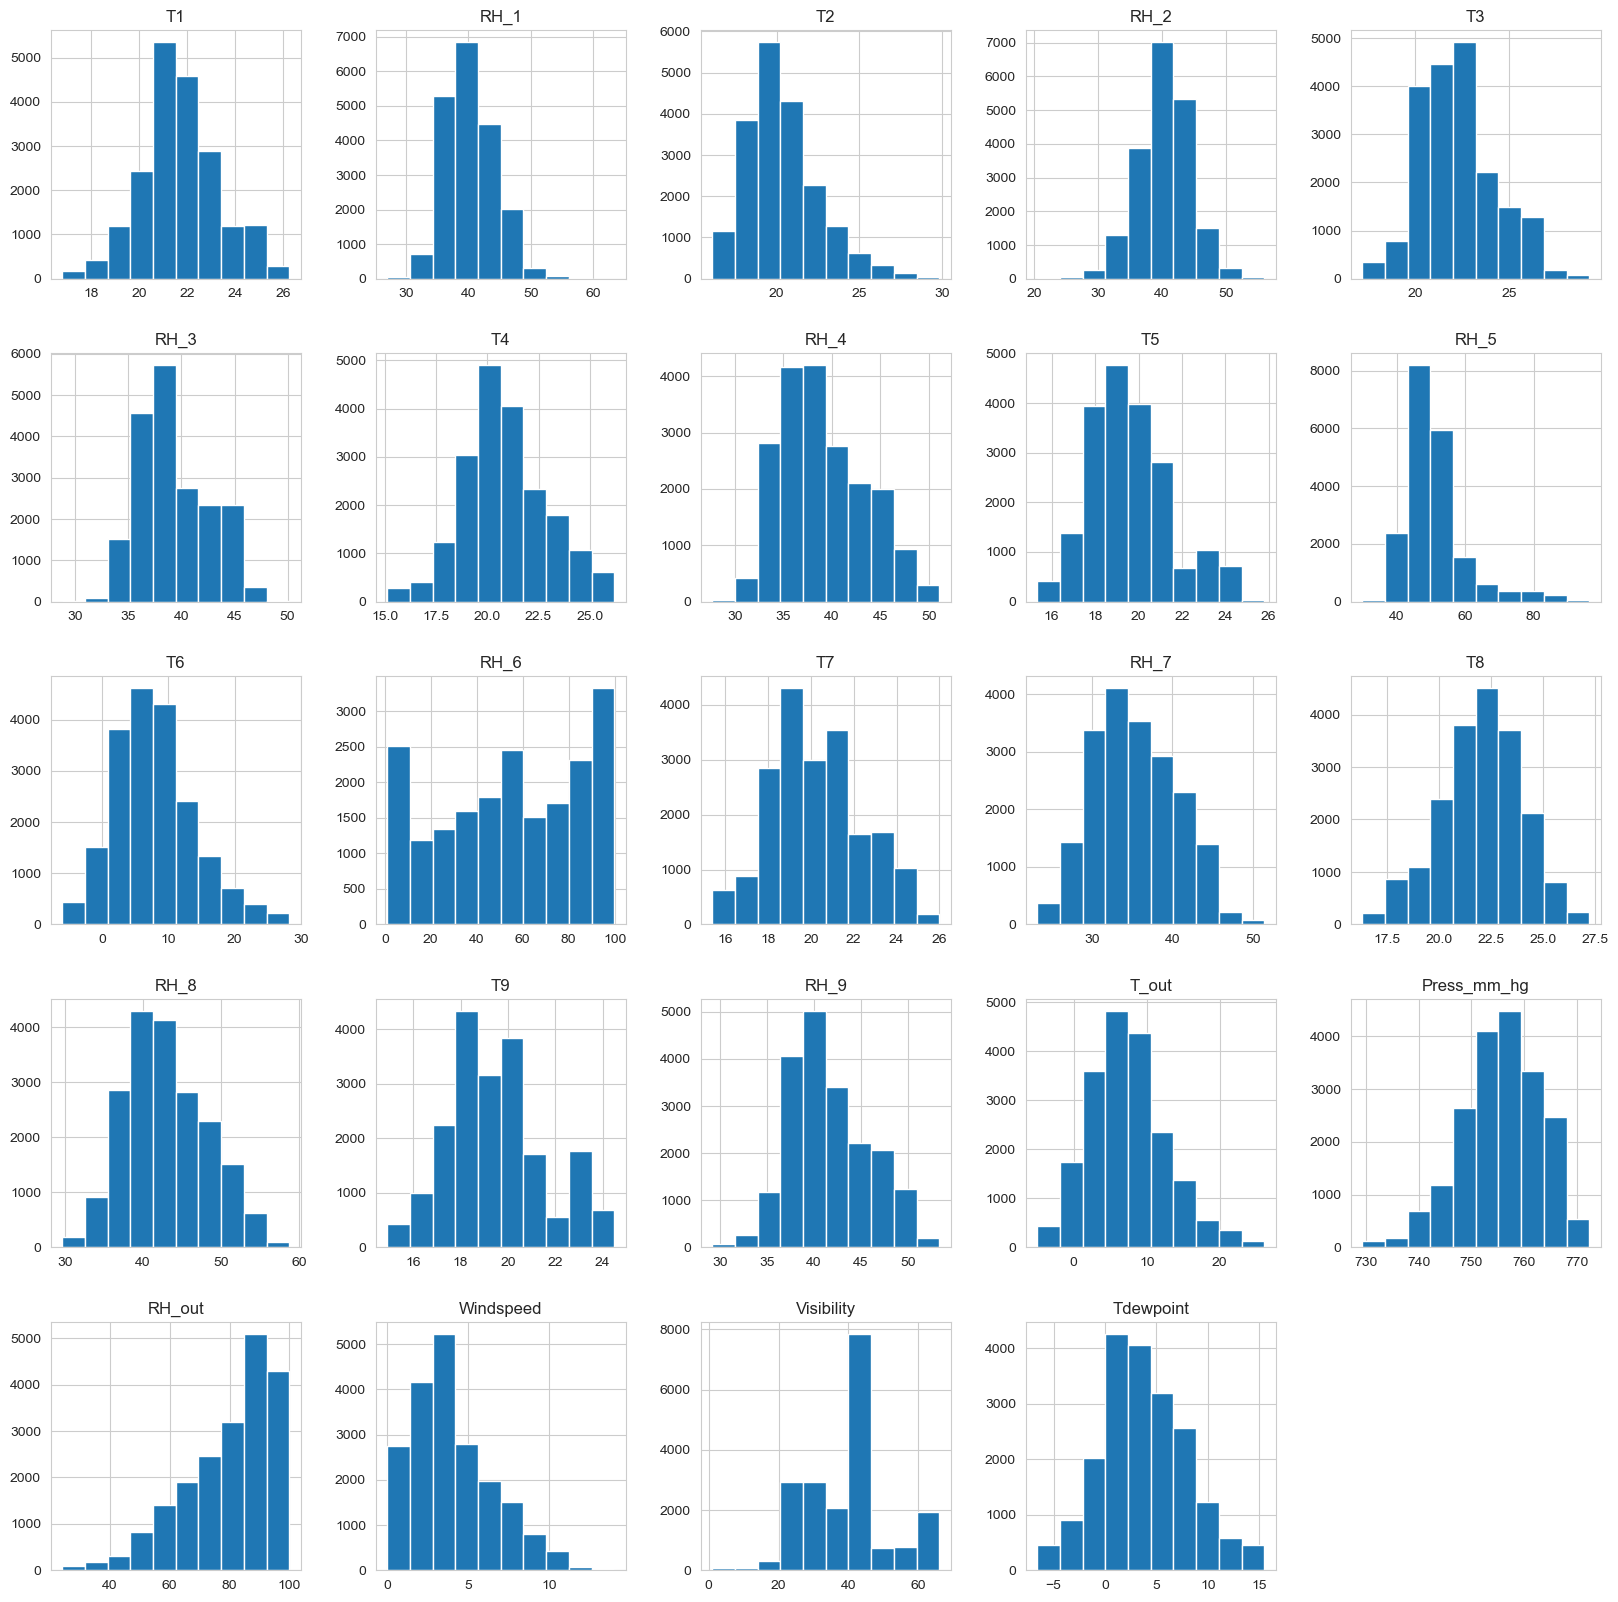

In [6]:
inputs.hist(figsize=(20,20))

In [7]:
inputs.skew()[np.abs(inputs.skew()) > 1.5]

RH_5    1.86682
dtype: float64

In [8]:
# RH5 seems like the only one with relevant skewness, so we are transforming it with a power
inputs["RH_5"] = inputs["RH_5"] ** (1/3)
inputs["RH_5"].skew()

1.4164881961707603

## Split Train Test

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size=0.2, random_state=42)

### Transform using normalization

In [10]:
original_mean = X_train.mean()
original_std = X_train.std()

In [89]:
import pickle
file = open("zscore_std.pickle", "wb")
# dump information to that file
pickle.dump(original_std, file)
# close the file
file.close()

In [11]:
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)

In [12]:
X_test = (X_test - original_mean) / original_std

# Neural Network Exploration

In [13]:

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers.legacy import SGD, Adam
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate dummy data
import numpy as np
from sklearn.metrics import r2_score

In [14]:
!pip install --no-deps scikeras

In [79]:
model = Sequential(
    [
        tf.keras.Input(shape=(24,), name="input_layer"),
        Dense(72, activation="tanh"),
        Dense(72, activation="tanh"),
        Dense(1, activation="linear", name="output_layer")
    ]
)

In [80]:
# optimizer = SGD(learning_rate=0.0001, momentum=0.05)
optimizer = Adam(learning_rate=0.001, beta_1=0.99, beta_2=0.999, epsilon=1e-7)

In [81]:
model.compile(optimizer=optimizer, loss="mean_squared_error")

In [82]:
r2_train = []
r2_test = []

In [83]:
from datetime import datetime
for i in range(1):
    model.compile(optimizer=optimizer, loss="mean_squared_error")
    history = model.fit(X_train, y_train, epochs=1000, batch_size=100)
    score_train = model.evaluate(X_train, y_train)
    Yhat_train = model.predict(X_train)
    
    r2_train.append(r2_score(y_train, Yhat_train))
    
    score_test = model.evaluate(X_test, y_test)
    Yhat_test = model.predict(X_test)
    r2_test.append(r2_score(y_test, Yhat_test))
    
    dt = str(datetime.now())
    base_name = "models/model_" + str(i) + "_score_test_" + str(np.round(r2_test[i], 4)) + "__" + dt
    with open(base_name + ".json", "w") as json_file:
        json_file.write(model.to_json())
    model.save_weights(base_name + ".h5")
    print(r2_train[i], ":::", r2_test[i])

Epoch 1/1000
158/158 [==============================] - 0s 595us/step - loss: 20509.5293
Epoch 2/1000
158/158 [==============================] - 0s 570us/step - loss: 17239.5742
Epoch 3/1000
158/158 [==============================] - 0s 597us/step - loss: 15098.0215
Epoch 4/1000
158/158 [==============================] - 0s 604us/step - loss: 13707.0342
Epoch 5/1000
158/158 [==============================] - 0s 616us/step - loss: 12722.4971
Epoch 6/1000
158/158 [==============================] - 0s 573us/step - loss: 12050.4688
Epoch 7/1000
158/158 [==============================] - 0s 578us/step - loss: 11621.5303
Epoch 8/1000
158/158 [==============================] - 0s 566us/step - loss: 11341.1533
Epoch 9/1000
158/158 [==============================] - 0s 572us/step - loss: 11168.1377
Epoch 10/1000
158/158 [==============================] - 0s 575us/step - loss: 10975.8984
Epoch 11/1000
158/158 [==============================] - 0s 568us/step - loss: 10722.1201
Epoch 12/1000
158/1

In [84]:
score_train = model.evaluate(X_train, y_train)
Yhat_train = model.predict(X_train)

494/494 [==============================] - 0s 324us/step


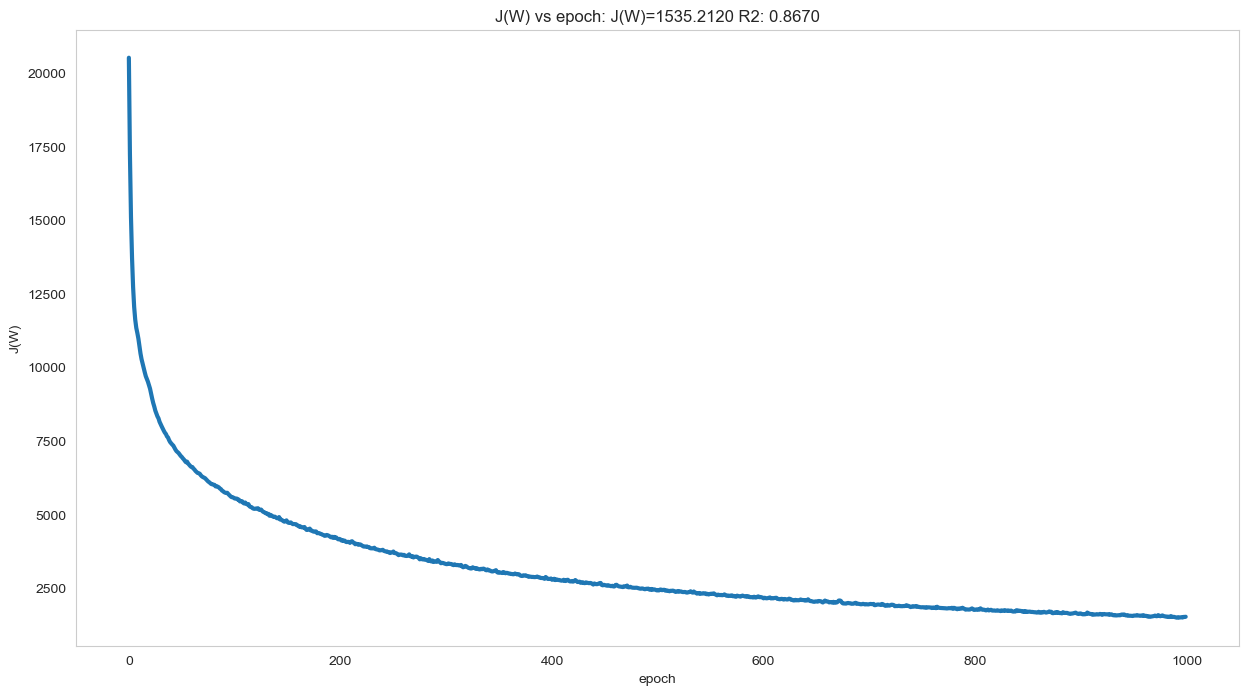

In [85]:
# %% Visualize the evolution of learning
J = history.history["loss"]
fig = plt.figure(figsize=(15, 8))
plt.plot(np.arange(len(J)), J, linewidth=3)
plt.title("J(W) vs epoch: J(W)=%0.4f" % J[-1] + " R2: %0.4f" % r2_score(y_train, Yhat_train))
plt.xlabel("epoch")
plt.ylabel("J(W)")
plt.grid()
plt.show()


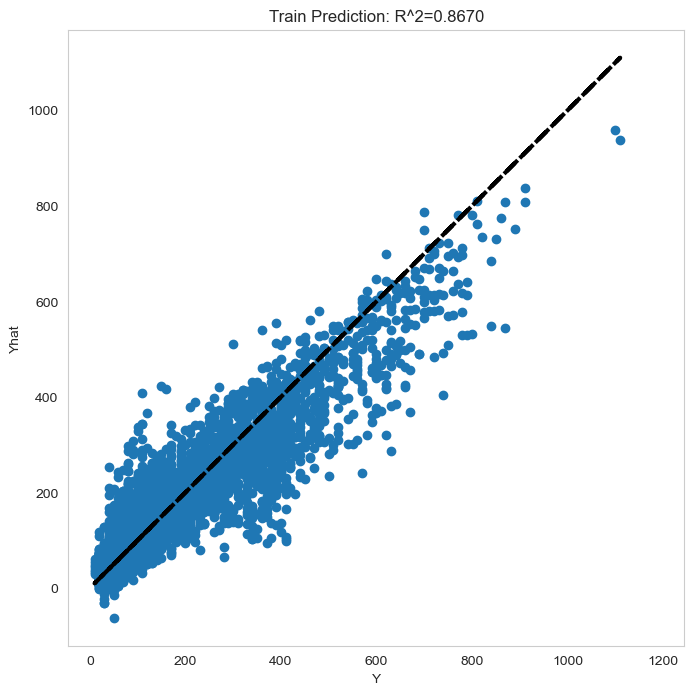

In [86]:
fig = plt.figure(figsize=(15, 8))
plt.scatter(y_train, Yhat_train)
plt.plot(y_train, y_train, "k--", linewidth=3)
plt.axis("square")
plt.title("Train Prediction: R^2=%0.4f" %  r2_score(y_train, Yhat_train))
plt.xlabel("Y")
plt.ylabel("Yhat")
plt.grid()
plt.show()

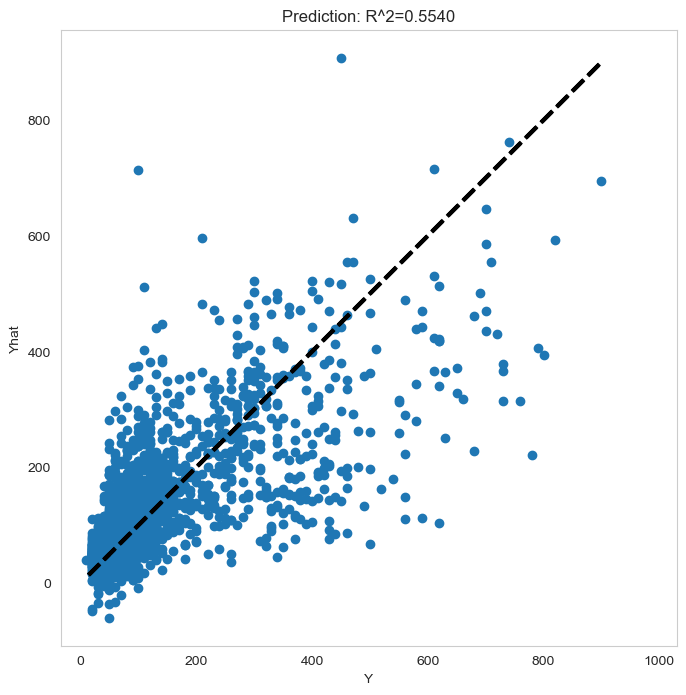

In [87]:
fig = plt.figure(figsize=(15, 8))
plt.scatter(y_test, Yhat_test)
plt.plot(y_test, y_test, "k--", linewidth=3)
plt.axis("square")
plt.title("Prediction: R^2=%0.4f" % r2_score(y_test, Yhat_test))
plt.xlabel("Y")
plt.ylabel("Yhat")
plt.grid()
plt.show()

In [148]:
Yhat_test = model.predict(X_test)
score = r2_score(y_test, Yhat_test)
print(score)

124/124 [==============================] - 0s 363us/step
0.4288467220336274


In [149]:
from sklearn.metrics import r2_score
score = r2_score(y_train, Yhat_train)
print(score_train)
print(score)


557.7294921875
0.9493593495223638


In [37]:
def create_model(lr=0.1, beta=0.9 ,activation="sigmoid"):
    # Neural network architecture
    model = Sequential()
    model.add(tf.keras.Input(shape=(24,), name="input_layer"))
    
    model.add(Dense(72,activation=activation))
    model.add(Dense(72,activation=activation))
        
    model.add(Dense(1,activation='linear'))
    # Optimizer configuration
    opt = Adam(learning_rate=lr, beta_1=beta)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

In [38]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers  import KerasRegressor

In [54]:
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer

# define the grid search parameters
learning_rates = [0.0001, 0.00005, 0.001]
betas = [0.9, 0.99, 0.8]
activation = ["sigmoid", "tanh", "relu"]
param_grid = dict(lr=learning_rates, beta=betas,activation=activation)

selection_score = make_scorer(r2_score)

In [55]:
model_search = KerasRegressor(build_fn=create_model,epochs=500, activation="sigmoid", beta=0.9 ,lr=0.1, batch_size=100)

In [56]:
grid = GridSearchCV(estimator=model_search, param_grid=param_grid,
                    cv=3,return_train_score=True,
                    scoring=selection_score)

In [ ]:
grid_result = grid.fit(X_train, y_train, )

In [58]:
print("Best parameters found:", grid_result.best_params_)
print("Best estimator found:", grid_result.best_estimator_)

# Extract mean test scores and standard deviations
mean_scores = grid_result.cv_results_['mean_test_score']
std_scores = grid_result.cv_results_['std_test_score']

for mean_score, std_score, params in zip(mean_scores, std_scores, grid_result.cv_results_['params']):
    print(f"Mean: {mean_score:.4f}, Std: {std_score:.4f} with: {params}")

Best parameters found: {'activation': 'tanh', 'beta': 0.99, 'lr': 0.001}
Best estimator found: KerasRegressor(
	model=None
	build_fn=<function create_model at 0x295529f80>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=100
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=500
	activation=tanh
	beta=0.99
	lr=0.001
)
Mean: 0.1584, Std: 0.0057 with: {'activation': 'sigmoid', 'beta': 0.9, 'lr': 0.0001}
Mean: 0.0908, Std: 0.0032 with: {'activation': 'sigmoid', 'beta': 0.9, 'lr': 5e-05}
Mean: 0.3860, Std: 0.0307 with: {'activation': 'sigmoid', 'beta': 0.9, 'lr': 0.001}
Mean: 0.1616, Std: 0.0053 with: {'activation': 'sigmoid', 'beta': 0.99, 'lr': 0.0001}
Mean: 0.0920, Std: 0.0043 with: {'activation': 'sigmoid', 'beta': 0.99, 'lr': 5e-05}
Mean: 0.3715, Std: 0.0193 with: {'activation': 'sigmoid', 'beta': 0.99, 'lr': 0.001}
Mean: 0.1607, Std: 0.0056 with: {'activation': 'sigmoid', 'b

In [68]:
grid_result.best_estimator_

KerasRegressor(
	model=None
	build_fn=<function create_model at 0x295529f80>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=100
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=500
	activation=tanh
	beta=0.99
	lr=0.001
)

In [66]:
grid_result.best_score_

0.4476831207054553

In [64]:
best_model = 

In [65]:
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

AttributeError: 'NoneType' object has no attribute 'predict'